## Spam Message Detection Classifier Project

### Overview 

1. Data Extraction ✔
2. Data cleaning ✔
    * dealing with null values
    * removing duplicates
3. EDA ✔
    * creating features such as number of characters, words and sentences to better understand the data
4. Text Preprocessing✔
    * Convert to lowercase
    * Tokenization
    * Removing Special Characters and punctuations
    * Removing Stop words
    * Stemming
    * Vectorization (convert text data into numerical feature)
        * Using Count Vectorizer
        * Using TF-IDF
5. Modeling (Model Building) ✔
    * Train Test Split
    * Naive Bayes
        * Gaussian Naive Bayes
        * Multinomial Naive Bayes
        * Bernoulli Naive Bayes
    * Some other Classifiers
        * SVC
        * KNeighbors
        * Random Forest
        * XGBoost
        * Gradient Boosted Decision Tree
        * Decision Tree
        * Logistic Regression
    * Evaluation and Model Selection 
    * Trying some Improvements
6. Export model and vectorizer for deployment ✔
    * Making Predictions on New Messages

### 1. Data Extraction

In [70]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk 
from nltk.corpus import stopwords

In [5]:
data = pd.read_csv('spam.csv')

In [6]:
data.sample(5)

v1                                                 v2 Unnamed: 2  \
2052  spam  Call 09094100151 to use ur mins! Calls cast 10...        NaN   
3267   ham  Which is why i never wanted to tell you any of...        NaN   
495    ham                                   Got meh... When?        NaN   
1731   ham  Lol. Well quality aint bad at all so i aint co...        NaN   
1012   ham     I dunno they close oredi not... ÌÏ v ma fan...        NaN   

     Unnamed: 3 Unnamed: 4  
2052        NaN        NaN  
3267        NaN        NaN  
495         NaN        NaN  
1731        NaN        NaN  
1012        NaN        NaN

In [7]:
data.shape

(5572, 5)

### 2. Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 columns as they contain almost no data
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [10]:
data.sample(5)

v1                                                 v2
5333   ham  Neither [in sterm voice] - i'm studying. All f...
5012   ham  Uncle G, just checking up on you. Do have a re...
2752   ham                         Sat right? Okay thanks... 
899   spam  Your free ringtone is waiting to be collected....
1770   ham  Dont show yourself. How far. Put new pictures ...

In [11]:
#right now the names of columns in data are not very desciptive, so we can rename them for better understanding
data.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [12]:
data.head()

target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [13]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [14]:
#we have our tauniquet variable as a categorical (text) variable with 2 classes (spam and ham) and we want to perform the task of binary classification
#so we will encode the target variable as numbers

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['target'] = encoder.fit_transform(data['target'])

In [15]:
data.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

Now our labels are encoded as numbers (0 = ham) and (1 = spam)

In [16]:
#check for any missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check for duplicate values
data.duplicated().sum()

403

In [18]:
#we need to remove the duplicate records / data
data = data.drop_duplicates(keep = 'first')

In [19]:
data.duplicated().sum()

0

In [20]:
data.shape

(5169, 2)

### 3. EDA (Exploratory Data Analysis)

Understanding our dataset

**1. Analyse the target variable / feature**

In [21]:
#take a look at the class distribution (spam vs ham) in our dataset
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

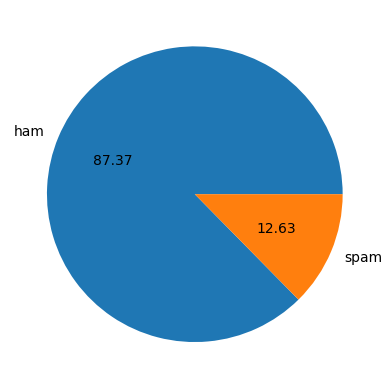

In [22]:
#visualize distribution using pie chart
plt.pie(data['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

We can see that our class distribution is highly imbalanced and we need to take special care of that when modeling and evaluating.

**2. Analyse the text data**

To analyse the text data we will perform some simple Natural Language Processing (NLP) Techniques and use the Natural Language Tool Kit (nltk) Library.

In this part we will create 3 new features for each message - number of characters in a message, number of words and number of sentences.

In [23]:
#create a feature as the number of characters in a message
data['num_characters'] = data['text'].apply(len)

In [24]:
data.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [25]:
#create a feature with the number / count of words in message - using nltk word tokenizer (it breaks the string into list of words)
data['text'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [26]:
#store this as new feature - number of words
data['num_words'] = data['text'].apply( lambda x : len(nltk.word_tokenize(x)) )

In [27]:
data.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [28]:
#similar to word tokenizer in nltk, we can use sentence tokenizer (sent_tokenize) to create a list of sentences from text data
data['text'].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [29]:
#we can create a new feature as number of sentences in text
data['num_sentences'] = data['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [30]:
data.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [31]:
#analyzing the stastics of newly created features to understand our text data better
data[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [32]:
#considering the data in HAM messages seperately
data[data['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [33]:
#considering the data in SPAM messages seperately
data[data['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

from the statistics above we can observe that the SPAM messages are usually longer than HAM messages.

<Axes: xlabel='num_characters', ylabel='Count'>

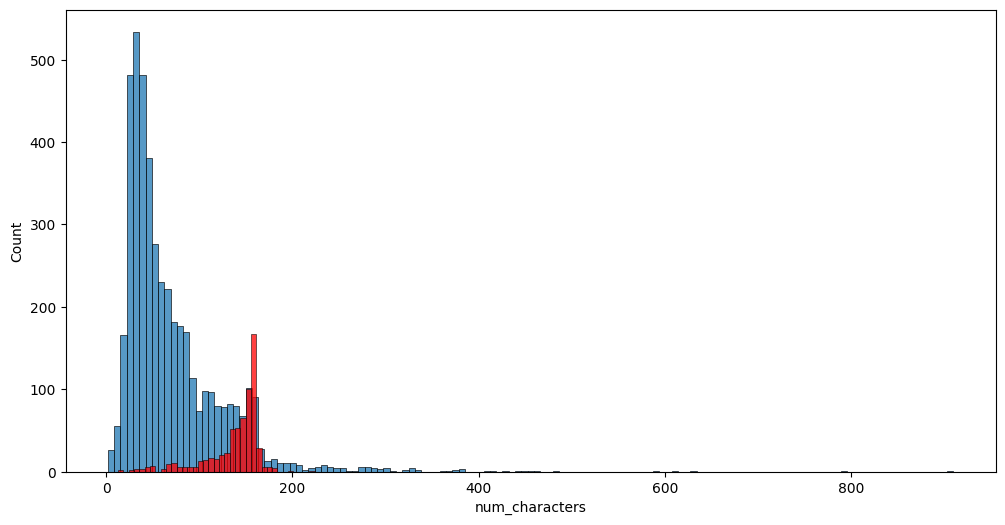

In [34]:
plt.figure(figsize = (12, 6))

#histogram for HAM messages
sns.histplot(data[data['target'] == 0]['num_characters'])

#histogram for SPAM messages
sns.histplot(data[data['target'] == 1]['num_characters'], color = 'red')

the Spam messages (red) are usually made up of more characters than Ham messages

<Axes: xlabel='num_words', ylabel='Count'>

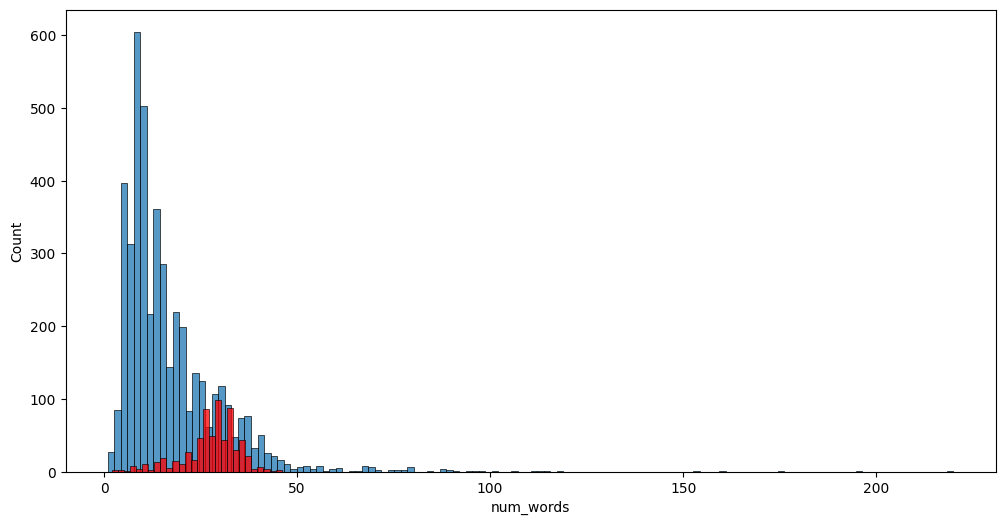

In [35]:
plt.figure(figsize = (12, 6))

#histogram for HAM messages
sns.histplot(data[data['target'] == 0]['num_words'])

#histogram for SPAM messages
sns.histplot(data[data['target'] == 1]['num_words'], color = 'red')

**Analyze the relationship between the numerical features (number of words, characters and sentences) of text**

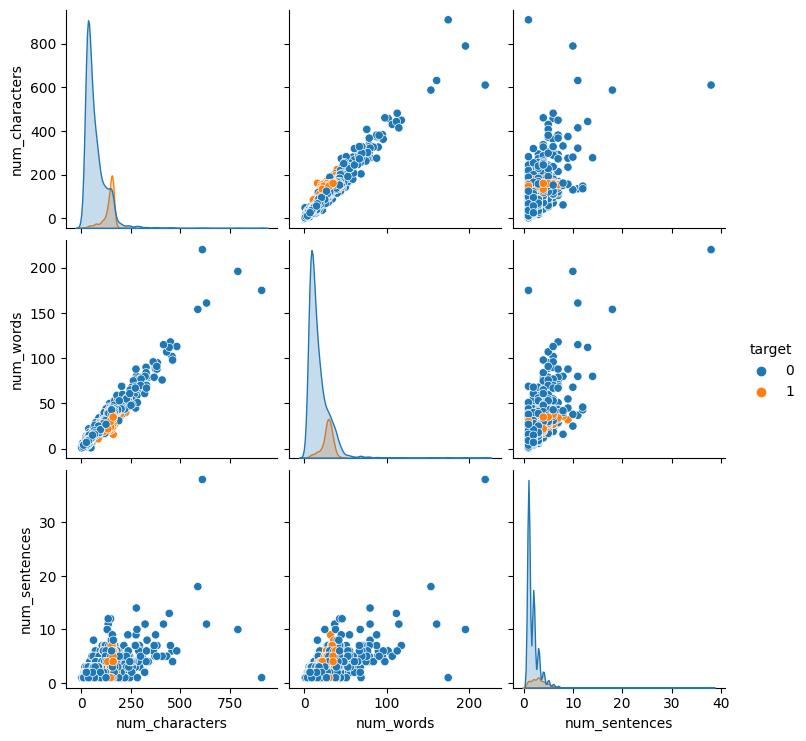

In [36]:
sns.pairplot(data, hue = 'target')

The data seems to have somewhat linear relationship and there are also a few clear outliers which we will have to deal with.

<Axes: >

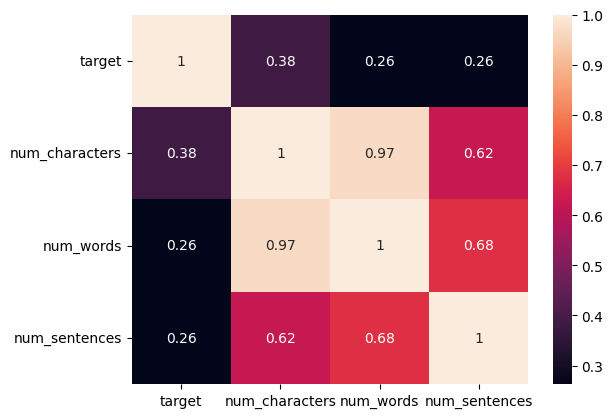

In [37]:
sns.heatmap(data[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot = True)

features 'num_characters', 'num_words' and 'num_sentences' are highly collinear, so we will just use the 'num_characters' feature as it also has the highest correlation with target.

### 4. Data / Text Preprocessing

* Convert to lowercase
* Tokenization
* Removing Special Characters and punctuations
* Removing Stop words
* Stemming
* Vectorization (convert text data into numerical feature)

In [82]:
from nltk.stem.porter import PorterStemmer

#function to perform all the preprocessing steps on text data
def transform_text(text):
    #convert text into lower case
    text = text.lower()
    
    #create word tokens from text string
    text = nltk.word_tokenize(text)
    
    #removing special characters and punctuations
    res1 = []
    for word in text:
        if word.isalnum():
            res1.append(word)
            
    #removing stop words
    res2 = []
    for word in res1:
        if word not in stopwords.words('english'):
            res2.append(word)
    
    #stemming - extracting base words 
    ps = PorterStemmer()
    
    res3 = []
    for word in res2:
        res3.append(ps.stem(word))
    
    #convert the word list back to string
    text = " ".join(res3)
    
    return text

In [81]:
#example usage
transform_text("Hello, My name is Aaditya Bansal and I like drawing. #artistlife 100% !! @adiaturb, How are you?")

'hello name aaditya bansal like draw artistlif 100 adiaturb'

In [83]:
data['transformed_text'] = data['text'].apply(transform_text)

In [84]:
data.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

**Top words used in SPAM and HAM messages**

**for SPAM**

In [100]:
#create a list of words in SPAM messages
spam_corpus = []
for message in data[data['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [102]:
len(spam_corpus)

9939

In [107]:
from collections import Counter

In [110]:
#extract the top 30 words
#counter creates a dictonary of words with there counts available
top_spam_word_count = pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ['word', 'count'])

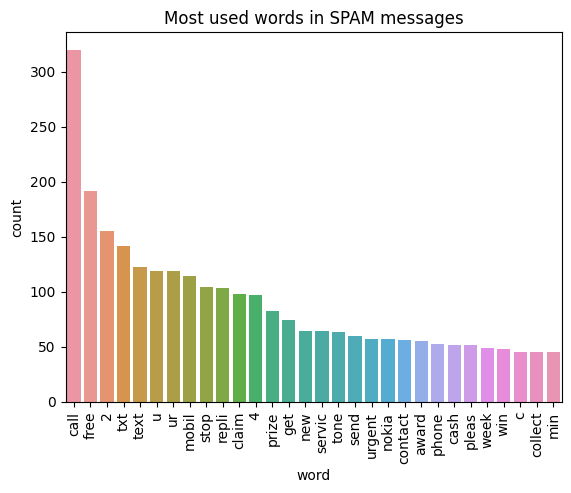

In [119]:
sns.barplot(data = top_spam_word_count, x = 'word', y = 'count')
plt.xticks(rotation = 'vertical')
plt.title('Most used words in SPAM messages')
plt.show()

**for HAM (not-SPAM)**

In [120]:
#create a list of words in SPAM messages
ham_corpus = []
for message in data[data['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [121]:
len(ham_corpus)

35404

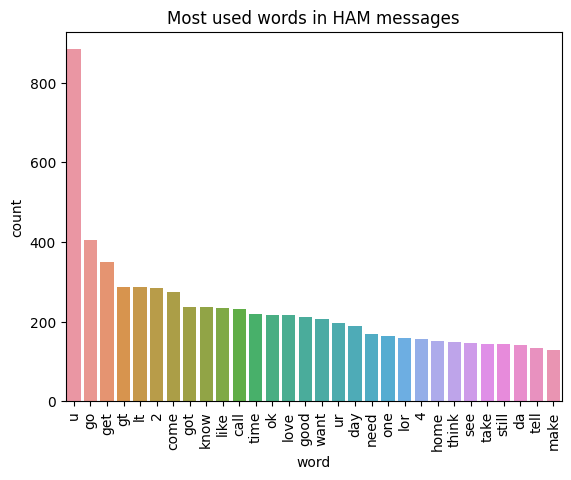

In [122]:
#extract the top 30 words
#counter creates a dictonary of words with there counts available
top_ham_word_count = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ['word', 'count'])

sns.barplot(data = top_ham_word_count, x = 'word', y = 'count')
plt.xticks(rotation = 'vertical')
plt.title('Most used words in HAM messages')
plt.show()

---
#### **Vectorization - convert text into numerical representation**

Extract features from the preprocessed data that could be used to train the machine learning model using techniques such as bag of words, term frequency-inverse document frequency (TF-IDF), and word embeddings.

In [146]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

---
**Using Count Vectorizer (simple bag of words representation)**

In [148]:
cv = CountVectorizer()

#converting sparse array returned after transformation into dense array
X = cv.fit_transform(data['transformed_text']).toarray()

X.shape

(5169, 6708)

---
**Using TF-IDF**

In [192]:
tfidf = TfidfVectorizer(max_features = 3000)

X = tfidf.fit_transform(data['transformed_text']).toarray()

X.shape

(5169, 3000)

---
**Extracting Target value from Dataset**

In [193]:
y = data['target'].values

In [194]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [135]:
y.shape

(5169,)

### 5. Modeling (Model Building)

**Spliting Data into Train and Test set**

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

---
#### **Naive Bayes**

In [197]:
#defining instances of differnent Naive Bayes Model Classes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [198]:
def print_result(y_actual, y_predicted):
    print("Accuracy Score : ")
    print(accuracy_score(y_actual, y_predicted))
    print()
    
    print("Confusion Matrix : ")
    print(confusion_matrix(y_actual, y_predicted))
    print()
    
    print("Precision Score : ")
    print(precision_score(y_actual, y_predicted))
    print()
    
    print("Recall Score : ")
    print(recall_score(y_actual, y_predicted))
    print()
    
    print("F1 Score : ")
    print(f1_score(y_actual, y_predicted))
    print()

In [165]:
#Gausian Naive Bayes

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print_result(y_test, y_pred_gnb)

Accuracy Score : 
0.8694390715667312

Confusion Matrix : 
[[788 108]
 [ 27 111]]

Precision Score : 
0.5068493150684932

Recall Score : 
0.8043478260869565

F1 Score : 
0.6218487394957983



In [166]:
#Multinomial Naive Bayes

mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print_result(y_test, y_pred_mnb)

Accuracy Score : 
0.9709864603481625

Confusion Matrix : 
[[896   0]
 [ 30 108]]

Precision Score : 
1.0

Recall Score : 
0.782608695652174

F1 Score : 
0.878048780487805



In [199]:
#Bernoulli Naive Bayes

bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print_result(y_test, y_pred_bnb)

Accuracy Score : 
0.9835589941972921

Confusion Matrix : 
[[895   1]
 [ 16 122]]

Precision Score : 
0.991869918699187

Recall Score : 
0.8840579710144928

F1 Score : 
0.9348659003831418



---
**Model Selection** 

Tf-Idf vectorizer with 3000 features performs better than count vectorizer.

Among the Models above **Bernoulli's Naive Bayes** have the highest f1 score which means it does not classify many normal message as a SPAM message and it correctly identifies SPAMs and HAMs, so we will select that to move furthur, because the class distribution is highly imbalanced so accuracy is not a good metric to measure the performance.

--- 
#### **Trying some other modeling techniques**

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [172]:
svc = SVC(kernel = 'sigmoid')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
rfc = RandomForestClassifier(random_state = 2)
xgb = XGBClassifier(random_state = 2)
gbdt = GradientBoostingClassifier(random_state = 2)
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression()

In [173]:
classifiers = {
    'SVC' : svc,
    'KNeighbors' : knc,
    'Multinomial Naive Bayes' : mnb,
    'Bernoulli Naive Bayes' : bnb,
    'Random Forest' : rfc,
    'XGBoost' : xgb,
    'Gradient Boosted Decision Tree' : gbdt,
    'Decision Tree' : dtc,
    'Logistic Regression' : lrc
}

In [175]:
#function to train the classifier and return the evaluation metrics (accuracy, precision, recall, f1-score)
def train_classifier(clf, X_train, y_train, X_test, y_test):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

Example use

In [176]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354,
 0.9747899159663865,
 0.8405797101449275,
 0.9027237354085604)

In [177]:
classifier_models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in classifiers.items():
    
    accuracy, precision, recall, f1 = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    classifier_models.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

In [179]:
evaluation_scores = pd.DataFrame(classifier_models, columns = ['Classifier'])
evaluation_scores['Accuracy'] = accuracy_scores
evaluation_scores['Precision'] = precision_scores
evaluation_scores['Recall'] = recall_scores
evaluation_scores['F1 Score'] = f1_scores

In [182]:
evaluation_scores.sort_values('F1 Score', ascending = False)

Classifier  Accuracy  Precision    Recall  F1 Score
3           Bernoulli Naive Bayes  0.983559   0.991870  0.884058  0.934866
0                             SVC  0.975822   0.974790  0.840580  0.902724
4                   Random Forest  0.975822   0.982906  0.833333  0.901961
5                         XGBoost  0.971954   0.936000  0.847826  0.889734
2         Multinomial Naive Bayes  0.970986   1.000000  0.782609  0.878049
8             Logistic Regression  0.956480   0.979381  0.688406  0.808511
6  Gradient Boosted Decision Tree  0.953578   0.924528  0.710145  0.803279
7                   Decision Tree  0.932302   0.833333  0.615942  0.708333
1                      KNeighbors  0.905222   1.000000  0.289855  0.449438

**Model Selection**

From the results above we can observe that **Bernoulli Naive Bayes** has the highest F1 Score and other metrics are also indicating good performance, so we can select it as our final model.

#### **Check if adding the Number of character feature provides any improvement in performance**

In [183]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [184]:
data['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [188]:
X_exp = np.hstack((X, data['num_characters'].to_numpy().reshape(-1, 1)))

In [189]:
X_exp

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [191]:
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y, test_size = 0.2, random_state = 2)

for name, clf in classifiers.items():
    
    accuracy, precision, recall, f1 = train_classifier(clf, X_train_exp, y_train_exp, X_test_exp, y_test_exp)
    
    print("For Classifier : ", name)
    print("Accuracy : ", accuracy)
    print("Precision : ", precision)
    print("Recall : ", recall)
    print("F1 Score : ", f1)
    print()

For Classifier :  SVC
Accuracy :  0.7775628626692457
Precision :  0.057692307692307696
Recall :  0.043478260869565216
F1 Score :  0.049586776859504134

For Classifier :  KNeighbors
Accuracy :  0.9342359767891683
Precision :  0.8301886792452831
Recall :  0.6376811594202898
F1 Score :  0.7213114754098361

For Classifier :  Multinomial Naive Bayes
Accuracy :  0.9410058027079303
Precision :  1.0
Recall :  0.5579710144927537
F1 Score :  0.7162790697674419

For Classifier :  Bernoulli Naive Bayes
Accuracy :  0.9835589941972921
Precision :  0.991869918699187
Recall :  0.8840579710144928
F1 Score :  0.9348659003831418

For Classifier :  Random Forest
Accuracy :  0.9700193423597679
Precision :  0.9734513274336283
Recall :  0.7971014492753623
F1 Score :  0.8764940239043825

For Classifier :  XGBoost
Accuracy :  0.97678916827853
Precision :  0.9453125
Recall :  0.8768115942028986
F1 Score :  0.9097744360902256

For Classifier :  Gradient Boosted Decision Tree
Accuracy :  0.9584139264990329
Precis

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Adding the extra feature does not make a huge difference in performance so we can move forward without it

### 6. Export Model and Vectorizer for Deployement

To make predictions on the new text messages we need to perform the following steps:
* perform preprocessing on text data
* vectorize the text
* apply model to make prediction

We need to use the following function to perform preprocessing steps:  
```
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#function to perform all the preprocessing steps on text data
def transform_text(text):
    #convert text into lower case
    text = text.lower()
    
    #create word tokens from text string
    text = nltk.word_tokenize(text)
    
    #removing special characters and punctuations
    res1 = []
    for word in text:
        if word.isalnum():
            res1.append(word)
            
    #removing stop words
    res2 = []
    for word in res1:
        if word not in stopwords.words('english'):
            res2.append(word)
    
    #stemming - extracting base words 
    ps = PorterStemmer()
    
    res3 = []
    for word in res2:
        res3.append(ps.stem(word))
    
    #convert the word list back to string
    text = " ".join(res3)
    
    return text
```

then use the tfidf vectorizer 

and then apply Beroulli Classifier to make predictions

In [200]:
import pickle

#create a pickle (byte) file to save the vectorizer object for later use 
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

#save the Beroulli Naive Bayes Classifier Model Object as pickle file
pickle.dump(bnb, open('classification_model.pkl', 'wb'))

---
**Making Predictions on new messages**

**Example 1** - trying a normal (not-spam) ham message

In [204]:
new_text = 'Hello, I am Aaditya Bansal, I heared that you are learning Machine Learning these days, let me know if you need any help.'

In [205]:
transform_text(new_text)

'hello aaditya bansal hear learn machin learn day let know need help'

In [210]:
new_text_vector = tfidf.transform([transform_text(new_text)]).toarray()

In [212]:
bnb.predict(new_text_vector)[0]

0

It correctly predicted our message as not spam

**Example 2** - trying a spam message

In [213]:
new_text2 = 'Congratulations dear customer, you have just won a grand price of 50000 dollars, call or message to the following number to recieve your price.'

In [214]:
transform_text(new_text2)

'congratul dear custom grand price 50000 dollar call messag follow number reciev price'

In [215]:
new_text_vector2 = tfidf.transform([transform_text(new_text2)]).toarray()

In [216]:
bnb.predict(new_text_vector2)[0]

1

It correctly predicted the message as SPAM